In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from math import ceil

In [4]:
# Creating Dataframes from the Dataset
df81 = pd.read_csv('D:/cu-bems/cu/2018Floor1.csv') 
df82 = pd.read_csv('D:/cu-bems/cu/2018Floor2.csv') 
df83 = pd.read_csv('D:/cu-bems/cu/2018Floor3.csv') 
df84 = pd.read_csv('D:/cu-bems/cu/2018Floor4.csv') 
df85 = pd.read_csv('D:/cu-bems/cu/2018Floor5.csv')  
df86 = pd.read_csv('D:/cu-bems/cu/2018Floor6.csv') 
df87 = pd.read_csv('D:/cu-bems/cu/2018Floor7.csv')
df91 = pd.read_csv('D:/cu-bems/cu/2019Floor1.csv') 
df92 = pd.read_csv('D:/cu-bems/cu/2019Floor2.csv') 
df93 = pd.read_csv('D:/cu-bems/cu/2019Floor3.csv') 
df94 = pd.read_csv('D:/cu-bems/cu/2019Floor4.csv') 
df95 = pd.read_csv('D:/cu-bems/cu/2019Floor5.csv') 
df96 = pd.read_csv('D:/cu-bems/cu/2019Floor6.csv') 
df97 = pd.read_csv('D:/cu-bems/cu/2019Floor7.csv') 


In [5]:
# We removed NaN values from the selected dataframes.
sample97 = df97.dropna()
sample87 = df87.dropna()
# We are retaining only 3 columns from the data frame
sample97 = sample97[['Date','z5_AC1(kW)','z5_S1(degC)']]
sample97['z5_S1(degC)'] = sample97['z5_S1(degC)'].apply(lambda x: round(x * 20)/20)
sample87 = sample87[['Date','z5_AC1(kW)','z5_S1(degC)']]
sample87['z5_S1(degC)'] = sample87['z5_S1(degC)'].apply(lambda x: round(x * 20)/20)
print(sample87, sample87['z5_AC1(kW)'].min(), sample87['z5_AC1(kW)'].max())

                       Date  z5_AC1(kW)  z5_S1(degC)
0       2018-07-01 00:00:00         0.0        28.95
1       2018-07-01 00:01:00         0.0        28.90
2       2018-07-01 00:02:00         0.0        28.90
3       2018-07-01 00:03:00         0.0        28.90
4       2018-07-01 00:04:00         0.0        28.90
...                     ...         ...          ...
105853  2018-09-12 12:13:00         0.0        27.35
105854  2018-09-12 12:14:00         0.0        27.40
105855  2018-09-12 12:15:00         0.0        27.50
105856  2018-09-12 12:16:00         0.0        27.60
105859  2018-09-12 12:19:00         0.0        27.75

[88906 rows x 3 columns] 0.0 20.1


In [6]:
# We are converting date in string to pandas date time
sample97['DT'] = pd.to_datetime(sample97['Date'])
sample87['DT'] = pd.to_datetime(sample87['Date'])

In [7]:
# We are taking the new pandas date time column
sample97 = sample97[['DT','z5_AC1(kW)','z5_S1(degC)']]
sample87 = sample87[['DT','z5_AC1(kW)','z5_S1(degC)']]
print(sample97)

                        DT  z5_AC1(kW)  z5_S1(degC)
93104  2019-03-06 15:44:00       10.03        21.80
93105  2019-03-06 15:45:00        9.91        21.50
93106  2019-03-06 15:46:00       10.06        21.30
93107  2019-03-06 15:47:00        9.93        21.15
93108  2019-03-06 15:48:00        9.14        21.00
...                    ...         ...          ...
525595 2019-12-31 23:55:00        0.00        29.45
525596 2019-12-31 23:56:00        0.00        29.45
525597 2019-12-31 23:57:00        0.00        29.40
525598 2019-12-31 23:58:00        0.00        29.40
525599 2019-12-31 23:59:00        0.00        29.40

[377567 rows x 3 columns]


In [8]:
# We are grouping by the date field from the date time and we are summing up the power in KW, and we are getting the maximum power in a day
# So the assumption is that when temperatures are hottest, the AC consumption is most. 
sample97 = sample97.groupby([sample97['DT'].dt.date]).agg({'z5_AC1(kW)': 'sum',
                                                     'z5_S1(degC)': 'max'})
sample87 = sample87.groupby([sample87['DT'].dt.date]).agg({'z5_AC1(kW)': 'sum',
                                                     'z5_S1(degC)': 'max'})
print(sample97)

            z5_AC1(kW)  z5_S1(degC)
DT                                 
2019-03-06      566.10        27.90
2019-03-07     4402.18        27.90
2019-03-08     3684.46        28.50
2019-03-09        0.00        29.50
2019-03-10        0.00        30.50
...                ...          ...
2019-12-27     4112.81        26.90
2019-12-28        0.00        27.90
2019-12-29        0.00        29.90
2019-12-30        0.00        30.75
2019-12-31        0.00        30.90

[283 rows x 2 columns]


In [9]:
# This considers only AC and Kw, ie. date column is removed.
final97 = sample97[['z5_AC1(kW)', 'z5_S1(degC)']]
# We are removing the values where AC is zero, because we dont want it to skew our values
final97 = final97[~(final97['z5_AC1(kW)'] == 0)]
# We are grouping by temperature and finding average power consumed for a given temperature. 
final97 = final97.groupby([final97['z5_S1(degC)']]).mean()
# restting pandas index
final97 = final97.reset_index()
# setting color to yellow
final97['color'] = 'y'
print(final97)

# same steps for the below

final87 = sample87[['z5_AC1(kW)', 'z5_S1(degC)']]
final87 = final87[~(final87['z5_AC1(kW)'] == 0)]
final87 = final87.groupby([final87['z5_S1(degC)']]).mean()
final87 = final87.reset_index()
final87['color'] = 'b'
print(final87)
# We are concatenating the two
merged = pd.concat([final87, final97])

    z5_S1(degC)   z5_AC1(kW) color
0         25.80  2337.010000     y
1         25.90  1993.700000     y
2         25.95  2214.420000     y
3         26.50  2740.950000     y
4         26.65  3688.340000     y
5         26.70  1098.100000     y
6         26.90  3359.885417     y
7         26.95  3493.735000     y
8         27.00  4056.430000     y
9         27.10  3201.690000     y
10        27.30  4053.600000     y
11        27.40  3425.350000     y
12        27.50  3791.800000     y
13        27.60  3598.295000     y
14        27.65  5359.650000     y
15        27.70  4547.390000     y
16        27.80  3943.431667     y
17        27.90  4133.840702     y
18        27.95  2038.620000     y
19        28.00  4190.835000     y
20        28.10  4820.946667     y
21        28.20  4283.970000     y
22        28.40  4860.220000     y
23        28.50  4577.610000     y
24        28.60  4143.122500     y
25        28.70  4943.310000     y
26        28.80  5234.351667     y
27        28.85  508

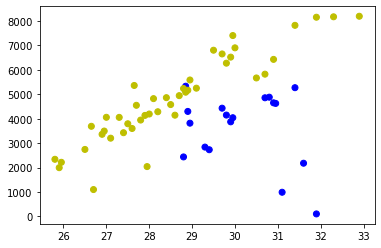

In [10]:
# creating a scatter plot
plt.scatter(merged['z5_S1(degC)'], merged['z5_AC1(kW)'], c=merged['color'])
plt.show()

In [12]:
import numpy as np

In [13]:
my_rho = np.corrcoef(merged['z5_S1(degC)'], merged['z5_AC1(kW)'])

In [14]:
print(my_rho)

[[1.         0.48870934]
 [0.48870934 1.        ]]


In [20]:
merged.drop(['color'], axis=1)


,z5_S1(degC),z5_AC1(kW)
0,28.80,2433.890000
1,28.85,5329.120000
2,28.90,4296.926667
3,28.95,3816.190000
4,29.30,2836.630000
...,...,...
39,30.90,6427.453333
40,31.40,7821.315000
41,31.90,8153.530000
42,32.30,8170.800000


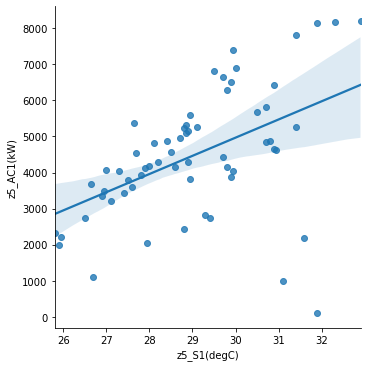

In [22]:
import seaborn as sns
sns.lmplot(x="z5_S1(degC)", y="z5_AC1(kW)",data=merged)

In [23]:
from scipy import stats
stats.pearsonr(merged['z5_S1(degC)'],merged['z5_AC1(kW)'])


(0.48870934291147744, 5.5754167740347764e-05)

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
x=merged['z5_S1(degC)'].to_numpy().reshape(-1,1)
y=merged['z5_AC1(kW)'].to_numpy()


In [30]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y) 

In [31]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.23883682184896793


In [32]:
print('intercept:', model.intercept_)

intercept: -10151.34971710401


In [33]:
print('slope:', model.coef_)

slope: [503.90183297]


In [34]:
 y_pred = model.predict(x)
 print('predicted response:', y_pred, sep='\n')

predicted response:
[4361.0230725  4386.21816415 4411.41325579 4436.60834744 4612.97398898
 4663.36417228 4814.53472217 4864.92490547 4915.31508877 4940.51018041
 5318.43655514 5368.82673844 5419.21692174 5444.41201339 5519.99728833
 5671.16783822 5771.94820482 5923.11875471 2849.31757358 2899.70775688
 2924.90284853 3202.04885666 3277.63413161 3302.82922325 3403.60958985
 3428.8046815  3453.99977315 3504.38995644 3605.17032304 3655.56050634
 3705.95068963 3756.34087293 3781.53596458 3806.73105623 3857.12123952
 3907.51142282 3932.70651447 3957.90160612 4008.29178942 4058.68197271
 4159.46233931 4209.8525226  4260.2427059  4310.6328892  4361.0230725
 4386.21816415 4411.41325579 4436.60834744 4512.19362239 4713.75435558
 4814.53472217 4864.92490547 4915.31508877 4940.51018041 4965.70527206
 5217.65618855 5318.43655514 5419.21692174 5671.16783822 5923.11875471
 6124.6794879  6427.02058768]


In [ ]:
# Creating a univariate histogram

final97
